In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def datos(ssolar,libradtran, nuevo_csv):
    df_SSolarGOA=pd.read_csv(ssolar)
    df_LibRadtran=pd.read_csv(libradtran, sep='\s+')
    df_LibRadtran['eglo']=df_LibRadtran['eglo']/1000
    df_LibRadtran['edir']=df_LibRadtran['edir']/1000
    df_LibRadtran['edn']=df_LibRadtran['edn']/1000
    df_LibRadtran['eup']=df_LibRadtran['eup']/1000
    df_LibRadtran['enet']=df_LibRadtran['enet']/1000
    df=pd.merge(df_SSolarGOA, df_LibRadtran, on='time', how='inner')
    df['direct_h'] = np.cos(np.radians(df['SZA'])) * df['direct']
    df['edir_h'] = np.cos(np.radians(df['sza'])) * df['direct']
    df.to_csv(nuevo_csv)
    return df

In [3]:
def tendencias(datos):
    df=pd.read_csv(datos)
    
    plt.figure(figsize=(10,5))
    plt.plot(df['time'],df['global'], label='global')
    plt.plot(df['time'],df['edir_h'], label='direct')
    plt.plot(df['time'],df['diffuse'], label='diffuse')
    plt.title('SSolarGOA')
    plt.xlabel('hora')
    plt.ylabel(r'$W/m^2$')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(df['time'],df['eglo'], label='global')
    plt.plot(df['time'],df['edir'], label='direct')
    plt.plot(df['time'],df['edn'], label='diffuse')
    plt.title('LibRadtran')
    plt.xlabel('hora')
    plt.ylabel(r'$W/m^2$')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,5))
    plt.plot(df['time'],df['global'], label='global_S')
    plt.plot(df['time'],df['edir_h'], label='direct_S')
    plt.plot(df['time'],df['diffuse'], label='diffuse_S')
    plt.plot(df['time'],df['eglo'], label='global_L')
    plt.plot(df['time'],df['edir'], label='direct_L')
    plt.plot(df['time'],df['edn'], label='diffuse_L')
    plt.title('SSolarGOA vs LibRadtran')
    plt.xlabel('hora')
    plt.ylabel(r'$W/m^2$')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(df['time'],df['global'], label='SSolarGOA')
    plt.plot(df['time'],df['eglo'], label='LibRadtran')
    plt.title('Global')
    plt.xlabel('hora')
    plt.ylabel(r'$W/m^2$')
    plt.legend()
    plt.show()
    
    #plt.figure(figsize=(10,5))
    #plt.plot(df['time'],df['direct'], label='SSolarGOA')
    #plt.plot(df['time'],df['edir'], label='LibRadtran')
    #plt.title('Direct')
    #plt.xlabel('hora')
    #plt.ylabel(r'$W/m^2$')
    #plt.legend()
    #plt.show()
    
    #plt.figure(figsize=(10,5))
    #plt.plot(df['time'],df['direct_h'], label='SSolarGOA SZA')
    #plt.plot(df['time'],df['edir'], label='LibRadtran')
    #plt.title('Direct Arreglada')
    #plt.xlabel('hora')
    #plt.ylabel(r'$W/m^2$')
    #plt.legend()
    #plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(df['time'],df['edir_h'], label='LibRadtran SZA')
    plt.plot(df['time'],df['edir'], label='LibRadtran')
    plt.title('Direct')
    plt.xlabel('hora')
    plt.ylabel(r'$W/m^2$')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(df['time'],df['diffuse'], label='SSolarGOA')
    plt.plot(df['time'],df['edn'], label='LibRadtran')
    plt.title('Diffuse')
    plt.xlabel('hora')
    plt.ylabel(r'$W/m^2$')
    plt.legend()
    plt.show()

In [4]:
datos('Alesund.txt','alesundlib.txt','alesund_datos')

,day_x,time,SZA,global,direct,diffuse,day_y,sza,eglo,edir,edn,eup,enet,direct_h,edir_h
0,120,4,89.193,2.7,22.3,2.3,120,89.021,6.109575,0.264811,5.844764,1.221915,4.88766,0.314081,0.381017
1,120,5,86.347,33.8,186.6,21.9,120,86.141,35.969990,11.689520,24.280470,7.193998,28.77599,11.888975,12.558431
2,120,6,83.482,77.9,325.7,40.9,120,83.243,77.482720,37.183800,40.298920,15.496540,61.98617,36.971949,38.321446
3,120,7,80.790,123.7,427.6,55.3,120,80.519,122.087400,69.222940,52.864500,24.417490,97.66995,68.438865,70.434500
4,120,8,78.452,165.3,498.6,65.5,120,78.152,163.384800,101.136400,62.248340,32.676950,130.70780,99.814138,102.370575
5,120,9,76.633,198.3,545.1,72.3,120,76.309,196.571800,127.797200,68.774620,39.314360,157.25750,126.020353,129.017284
6,120,10,75.468,219.6,571.7,76.2,120,75.125,218.219200,145.555000,72.664180,43.643830,174.57530,143.451353,146.761740
7,120,11,75.046,227.4,580.7,77.5,120,74.689,226.235000,152.193200,74.041790,45.246990,180.98800,149.845841,153.338612
8,120,12,75.399,220.9,573.2,76.4,120,75.034,219.879700,146.927500,72.952200,43.975950,175.90380,144.495837,148.026497


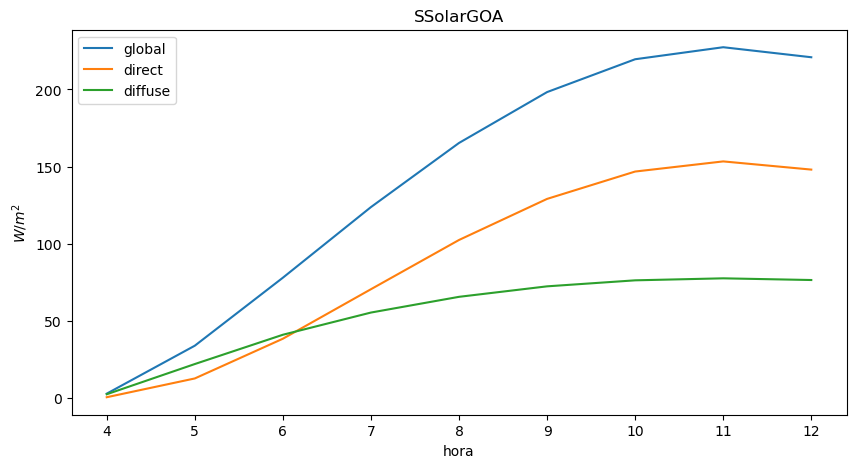

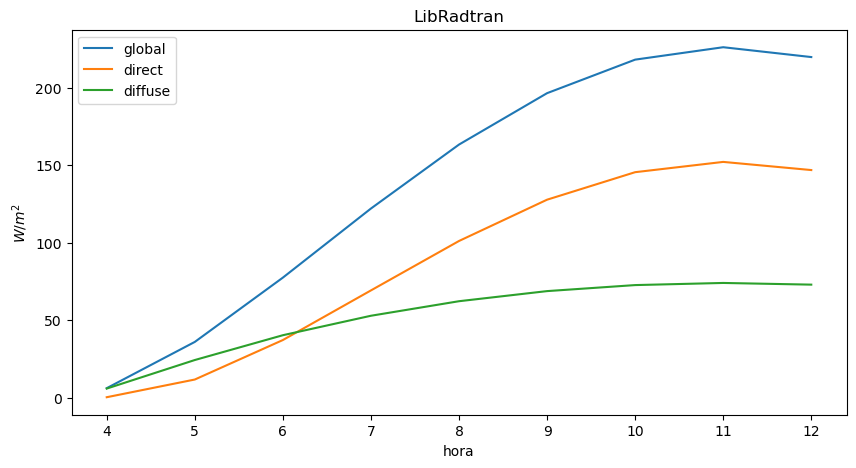

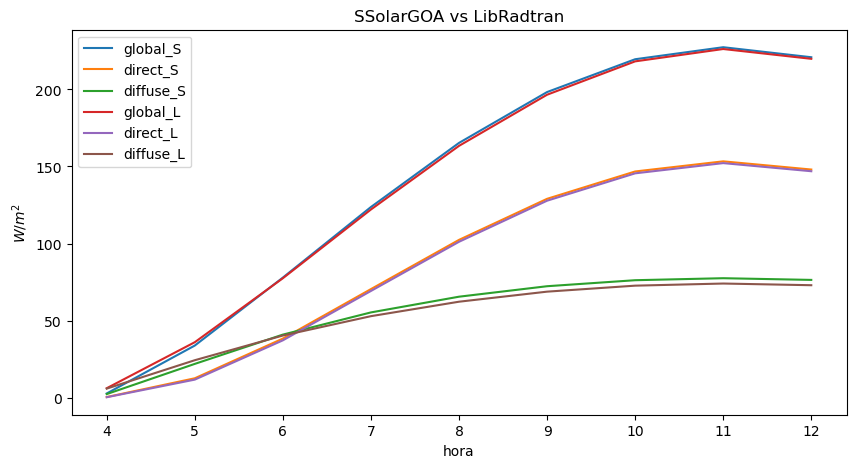

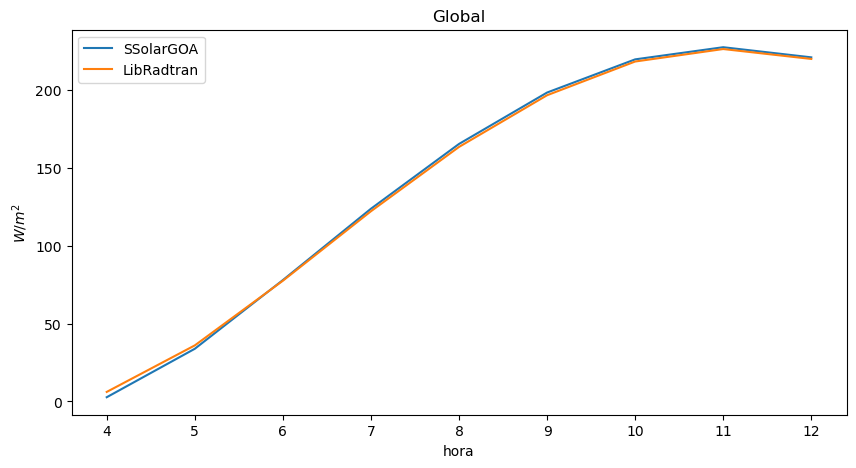

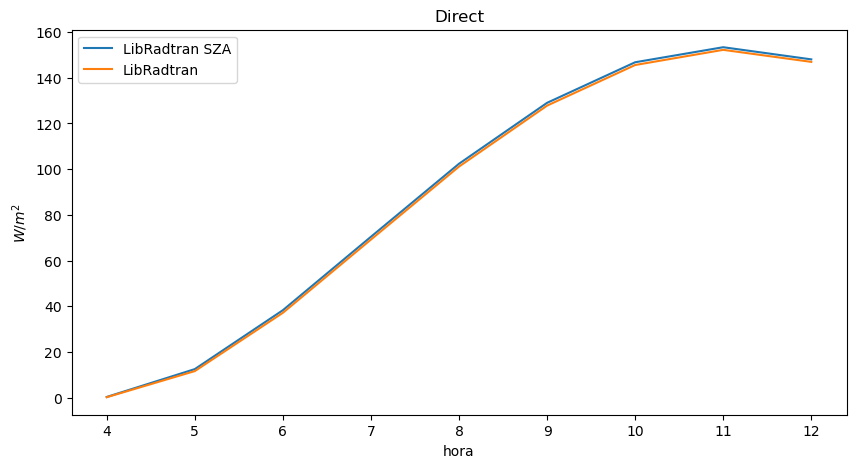

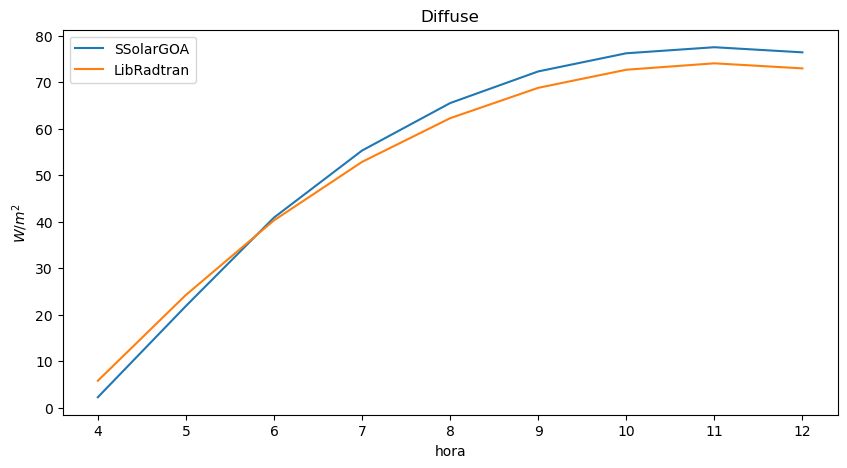

In [5]:
tendencias('alesund_datos')